# Introduction

We are **Vector Nation**. Composed of the following:
- Ariaga, Marian
- Clemente, Francis
- De Guzman, Evan
- Villaflores, Charlize

Taking STINTSY, section S16 under Sir Alvin Alon. 

This **Major Course Output (MCO)** aims to solve both a classification and regression task task using the Philippine Statistics Authority or PSA's <span style="color:green">**Family Income and Expenditure dataset**.</span> 

### The Tasks

In specificity, the group aims to create train and test two machine learning models that can:
1. Classify employment status based on education level and
2. Predict food budget for different family sizes

We will use these three algorithms: (still not sure lmao)
- kNN Clustering Algorithm
- Linear Regression and Logistic Regression
- Neural Networks

# Description of the Data Set

Once again, the data set that we will use is  <span style="color:green">**Family Income and Expenditure dataset**.</span>. The original data set has an enormous 119 variables to use. For the purposes of the tasks at hand, many variables will be cut off 

# List of Requirements

<span style="color:red">**#TODO**</span> Update accordingly depending on what we use in the entirety of the notebook.

# Data Cleaning and Pre-Processing

Loading in Prerequisites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

#Eventually we'll add more;

Loading in the csv dataset and splitting into the important features for this classifcaiton problem.



In [2]:
class_df = pd.read_csv("FIES PUF 2012 Vol.1.CSV")
class_df = class_df[["WAGES", "TENURE", "CW", "PCINC", "JOB", "OCCUP"]] 
print(class_df.head())
print(class_df.dtypes)

   WAGES  TENURE CW      PCINC  JOB OCCUP
0      0       1     108417.00    2      
1      0       1  3   30631.60    1  1314
2      0       1      86992.50    2      
3      0       1  4   43325.75    1  6111
4  32000       1  1   37481.80    1  5220
WAGES       int64
TENURE      int64
CW         object
PCINC     float64
JOB         int64
OCCUP      object
dtype: object


In [3]:
class_df[["WAGES", "TENURE", "CW", "PCINC", "JOB", "OCCUP"]].isnull().sum()

WAGES     0
TENURE    0
CW        0
PCINC     0
JOB       0
OCCUP     0
dtype: int64

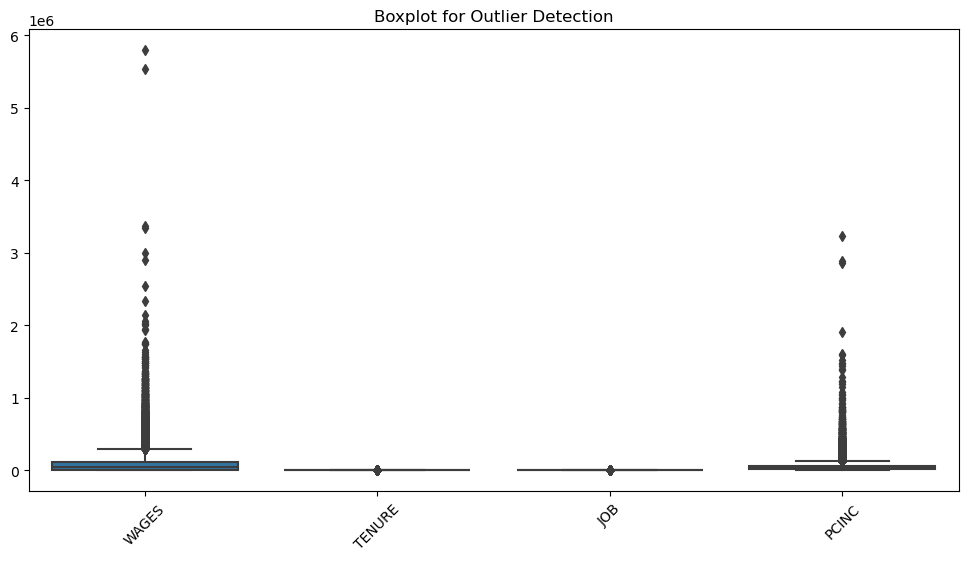

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=class_df[["WAGES", "TENURE", "JOB", "PCINC"]])  
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


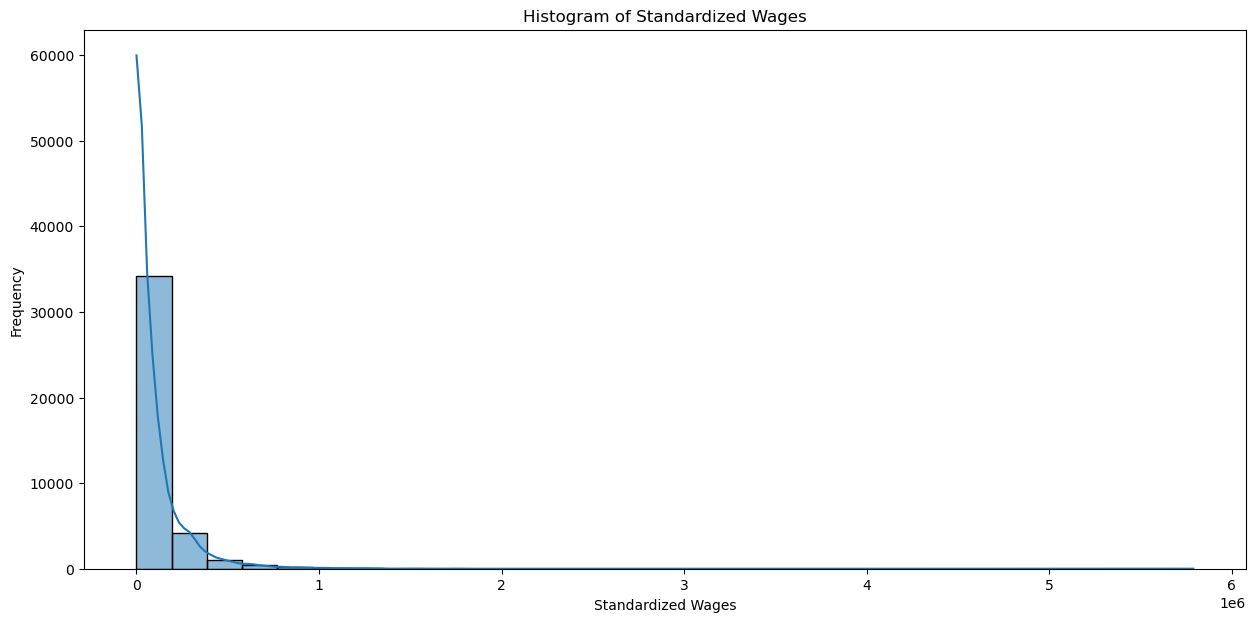

In [5]:
plt.figure(figsize=(15,7))
sns.histplot(class_df['WAGES'], bins=30, kde=True)
plt.title("Histogram of Standardized Wages")
plt.xlabel("Standardized Wages")
plt.ylabel("Frequency")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


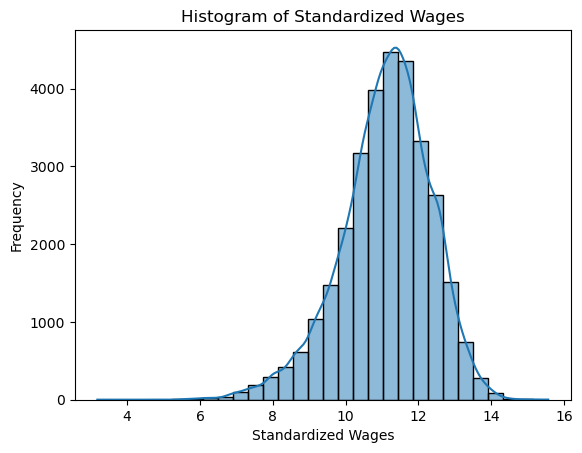

In [6]:
class_df = class_df[class_df['WAGES'] > 0]
class_df['WAGES_LOG'] = np.log1p(class_df['WAGES'])  # log(1 + WAGES) to handle zeroes safely

sns.histplot(class_df['WAGES_LOG'], bins=30, kde=True)
plt.title("Histogram of Standardized Wages")
plt.xlabel("Standardized Wages")
plt.ylabel("Frequency")
plt.show()

# EDA